In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm

In [2]:
def DealMissingData(X, dfX):
    ''' deal with missing data
        X: data, type(numpy array)
        dfX: same as X data, type(pandas array) '''
    
    print("----------- Start deal missing data -----------")
    TFarr = np.array(dfX.isna().any())
    for index, ele in enumerate(TFarr):
        if ele:
            if isinstance(X[0][index], str):
                # deal with string data
                imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
                imputer.fit(X[:, [index]])
                X[:, [index]] = imputer.transform(X[:, [index]])
            else:
                # deal with digital data
                imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
                imputer.fit(X[:, [index]])
                X[:, [index]] = imputer.transform(X[:, [index]])
            print(f"{index} column have missing data, fixed!")
        else:
            print(f"{index} column not have missing data")
            
    print("----------- End deal missing data! -----------")
    return X

In [3]:
def MakeOneHot(X, pos={}):
    ''' make one-hot  
        X: data, type(numpy array)
        pos: where need to onehot, type(dictionary) '''
    
    print("----------- Start onehot -----------")
    FeaturesNum = len(X[0])    # init
    for key in pos:
        print(f"{FeaturesNum-pos[key]} column need to one-hot, fixed!")
        ct = ColumnTransformer([(key, OneHotEncoder(), [FeaturesNum-pos[key]])], remainder='passthrough')
        NewX = ct.fit_transform(X)
        X = NewX[:, 1:]
        FeaturesNum = len(X[0])
    
    #print(FeaturesNum)
    #print(X[0])
    print("----------- End onehot -----------")
    return X


In [4]:
def NormalizeData(data_train, data_test):
    ''' normalize data
        data_train: training data, type(numpy array)
        data_test: testing data, type(numpy array) '''
    
    print("----------- Start normalize -----------")
    sc = StandardScaler()
    data_train = sc_X.fit_transform(data_train)
    data_test = sc_X.transform(data_test)
    
    print("----------- End normalize -----------")
    return data_train, data_test

In [5]:
def DrawRelationship(X, y, label_x, label_y , ispred=False, pred=None):
    for key in label_x:
        allarr = []
        for i in range(len(X)):
            allarr.append(X[i][label_x[key]])
        
        if ispred:
            plt.scatter(allarr, pred, c="blue")
        plt.scatter(allarr, y, c="red")
        plt.xlabel(key)
        plt.ylabel(label_y)
        plt.show() 

<h1>Data preprocessing</h1>

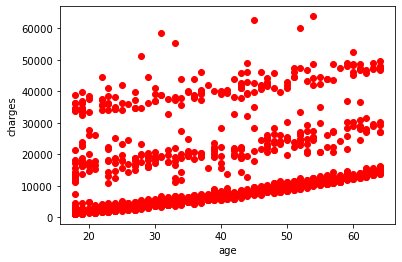

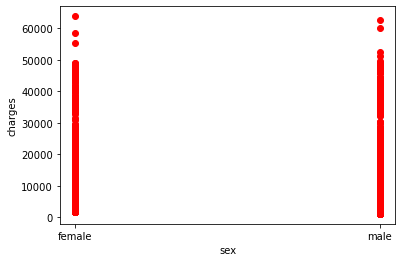

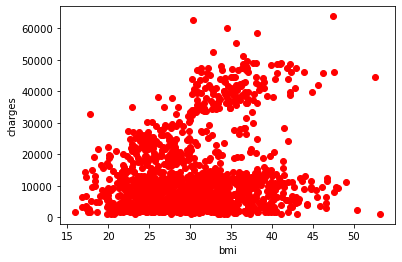

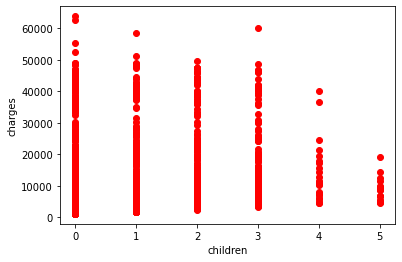

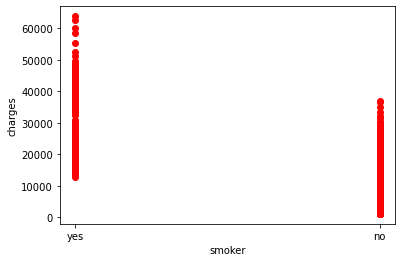

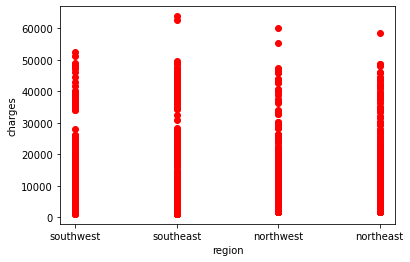

----------- Start deal missing data -----------
0 column not have missing data
1 column not have missing data
2 column not have missing data
3 column not have missing data
4 column not have missing data
5 column not have missing data
----------- End deal missing data! -----------
----------- Start onehot -----------
1 column need to one-hot, fixed!
3 column need to one-hot, fixed!
8 column need to one-hot, fixed!
9 column need to one-hot, fixed!
----------- End onehot -----------
Preprocessing data done!


In [6]:
df = pd.read_csv("./DATA/final_project_dataset_1.csv")

dfX = df.iloc[:, :-1]
X = dfX.values
y = df.iloc[:, -1].values
DrawRelationship(X, y, label_x={'age': 0, 'sex': 1, 'bmi': 2, 'children': 3, 'smoker': 4, 'region': 5}, label_y='charges')

X = DealMissingData(X, dfX)

pos2onehot = {'Sex': 5, 'children': 3, 'Smoker': 2, 'Region': 1}
X = MakeOneHot(X, pos2onehot)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# X_train, X_test = NormalizeData(X_train, X_test)

print("Preprocessing data done!")

<h1>Polynomial</h1>

In [7]:
poly_reg = PolynomialFeatures(degree=7)    # degree=1 >> b + bX1  ==  linear
X_poly = poly_reg.fit_transform(X_train)

# linear gression
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_poly, y_train)

LinearRegression()

In [8]:
Poly_pred = poly_lin_reg.predict(poly_reg.transform(X_test))
Poly_acc = poly_lin_reg.score(poly_reg.transform(X_test), y_test)

In [9]:
print(Poly_pred[0])
print(Poly_acc)

8458.183596189658
-82537649.57362166


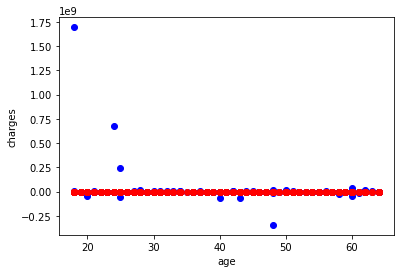

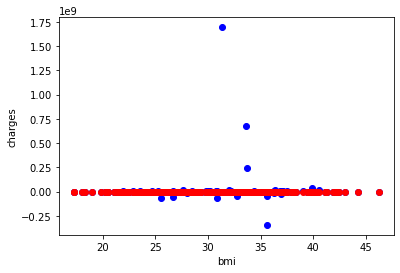

In [10]:
DrawRelationship(X_test, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Poly_pred)

<h1>Linear</h1>

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [12]:
Linear_pred = lin_reg.predict(X_test)
Linear_acc = lin_reg.score(X_test, y_test)

In [13]:
print(Linear_pred[:5])
print(Linear_acc)

[11135.73804883  9446.44007899 38866.31389769 16130.19841251
  6829.59464758]
0.7983507767817665


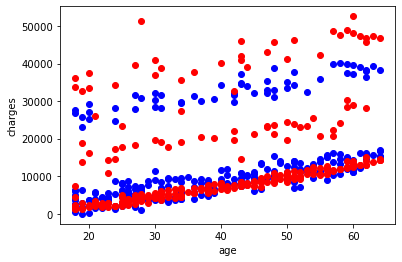

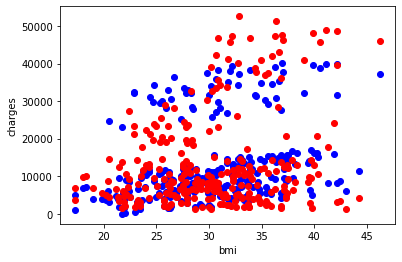

In [14]:
DrawRelationship(X_test, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Linear_pred) 

<h1>OLS</h1>

In [15]:
# append 1 std
X_train_std = np.append(arr=np.ones((len(X_train), 1)).astype(int), values=X_train, axis=1)
print(X_train_std[:5])

[[1 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 37 34.1]
 [1 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 18 34.43]
 [1 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 23 36.67]
 [1 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 32 35.2]
 [1 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 58 32.395]]


In [16]:
# try to optimize model
X_opt = X_train_std[:, [0, 4, 6, 8, 11, 12]]
X_opt = np.array(X_opt, dtype=float)
# sm.OLS()
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     597.3
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          7.88e-306
Time:                        22:02:59   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1064   BIC:                         2.174e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.173e+04   1051.856    -11.153      0.000   -1.38e+04   -9667.129
x1          2.357e+04    467.529     50.416      0.000    2.27e+04    2.45e+04
x2          1471.2160    493.112      2.984      0.003     503.633    2438.799
x3          2953.8260   1427.979      2.069      0.039     151.851    5755.801
x4           256.1202     13.466     19.020      0.000     229.698     282.542
x5           318.3000     30.639     10.389      0.000     258.180     378.420
==============================================================================
Omnibus:                      251.564   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              598.907
Skew:                           1.259   Prob(JB):                    8.89e-131
Kurtosis:                       5.664   Cond. No.                         389.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X_train_opt = X_train[:, [3, 5, 7, 10, 11]]    # select opt's columns
X_test_opt = X_test[:, [3, 5, 7, 10, 11]]   # select opt's columns correspond train

<h1>Poly opt</h1>

In [18]:
poly_reg = PolynomialFeatures(degree=7)    # degree=1 >> b + bX1  ==  linear
X_poly = poly_reg.fit_transform(X_train_opt)

poly_reg_opt = LinearRegression()
poly_reg_opt.fit(X_poly, y_train)

LinearRegression()

In [19]:
Poly_pred_opt = poly_reg_opt.predict(poly_reg.fit_transform(X_test_opt))
Poly_acc_opt = poly_reg_opt.score(poly_reg.fit_transform(X_test_opt), y_test)

In [20]:
print(Poly_pred_opt[0])
print(Poly_acc_opt)

11989.93853670318
-363.5592809660458


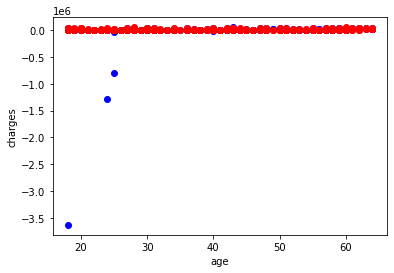

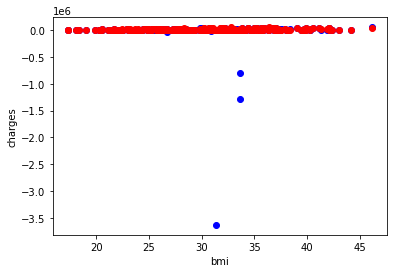

In [21]:
DrawRelationship(X_test_opt, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Poly_pred_opt) 

<h1>Linear opt</h1>

In [22]:
linear_reg_opt = LinearRegression()
linear_reg_opt.fit(X_train_opt, y_train)
# than we can find the performance better than previous model's

LinearRegression()

In [23]:
Linear_pred_opt = linear_reg_opt.predict(X_test_opt)
Linear_acc_opt = linear_reg_opt.score(X_test_opt, y_test)

In [24]:
print(Linear_pred_opt[:5])
print(Linear_acc_opt)

[11199.83105446  9655.04122364 38516.55180784 16108.60647424
  7076.36602401]
0.7951974644615368


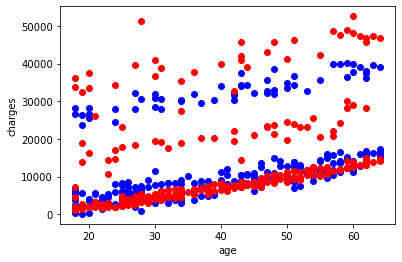

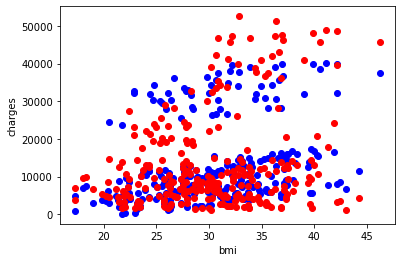

In [25]:
DrawRelationship(X_test_opt, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Linear_pred_opt) 

<h1>SVR</h1>

In [46]:
svr_reg = SVR(kernel='linear')  # linear > poly > rbf in this case
svr_reg.fit(X_train, y_train)

SVR(kernel='linear')

In [47]:
Svr_pred = svr_reg.predict(X_test)
Svr_acc = svr_reg.score(X_test, y_test)

In [48]:
print(Svr_pred[5])
print(Svr_acc)

5969.595359135326
-0.08966934744948252


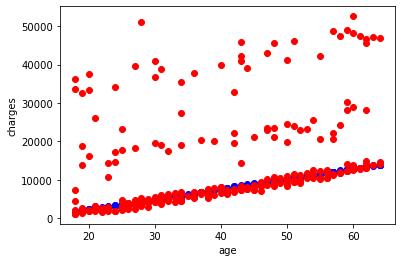

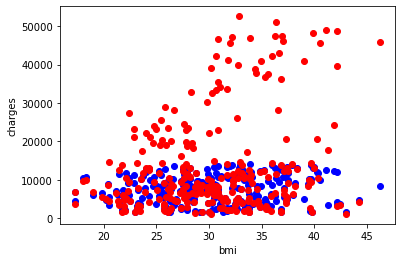

In [49]:
DrawRelationship(X_test, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Svr_pred) 

<h1>DecisionTreeRegressor</h1>

In [30]:
dec_reg = DecisionTreeRegressor(criterion='mse', random_state=0)
dec_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [31]:
Dec_pred = dec_reg.predict(X_test)
Dec_acc = dec_reg.score(X_test, y_test)

In [32]:
print(Dec_pred[:5])
print(Dec_acc)

[10065.413    8233.0975  44202.6536  13143.86485  9566.9909 ]
0.6870429176767843


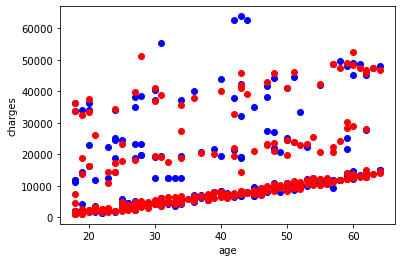

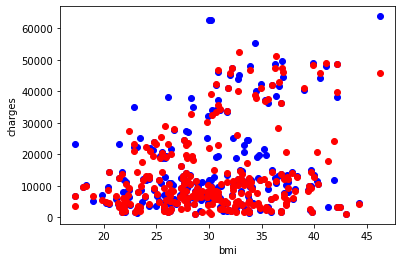

In [33]:
DrawRelationship(X_test, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Dec_pred) 

<h1>mean_squared_error</h1>

In [34]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, Poly_pred)))
print(np.sqrt(mean_squared_error(y_test, Linear_pred)))
print(np.sqrt(mean_squared_error(y_test, Poly_pred_opt)))
print(np.sqrt(mean_squared_error(y_test, Linear_pred_opt)))
print(np.sqrt(mean_squared_error(y_test, Svr_pred)))
print(np.sqrt(mean_squared_error(y_test, Dec_pred)))

114604595.13447611
5664.665329302641
240857.43634836783
5708.784438364391
13254.246715293111
7056.971639346136


<h1>Dec opt</h1>

In [35]:
dec_reg_opt = DecisionTreeRegressor(criterion='mse', random_state=0)
dec_reg_opt.fit(X_train_opt, y_train)

DecisionTreeRegressor(random_state=0)

In [36]:
Dec_pred_opt = dec_reg_opt.predict(X_test_opt)
Dec_acc_opt = dec_reg_opt.score(X_test_opt, y_test)

In [37]:
print(Dec_pred[:5])
print(Dec_acc)

[10065.413    8233.0975  44202.6536  13143.86485  9566.9909 ]
0.6870429176767843


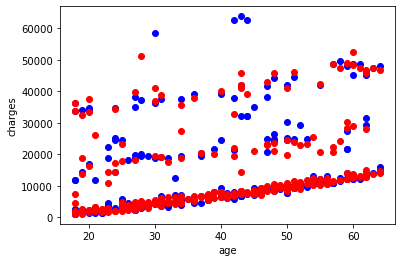

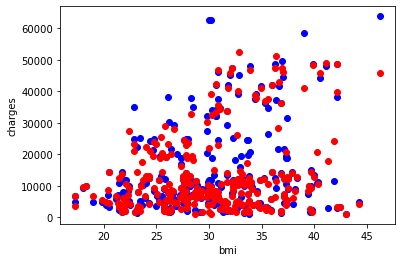

In [38]:
DrawRelationship(X_test_opt, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Dec_pred_opt) 

In [39]:
print(np.sqrt(mean_squared_error(y_test, Dec_pred_opt)))

7458.521880067536


<h1>LassoCV</h1>

In [57]:
from sklearn.linear_model import LassoCV
lasso_reg = LassoCV()
lasso_reg.fit(X_train, y_train)

LassoCV()

In [58]:
Lasso_pred = lasso_reg.predict(X_test)
Lasso_acc = lasso_reg.score(X_test, y_test)

In [60]:
print(Lasso_pred[:5])
print(Lasso_acc)

[11327.71944616  9603.16664907 38254.03590504 16468.29384462
  7298.40576318]
0.7953377956052091


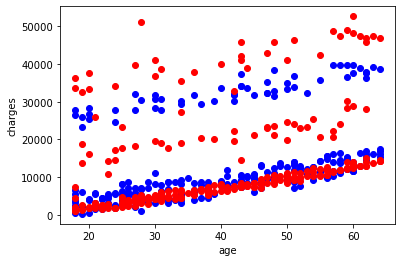

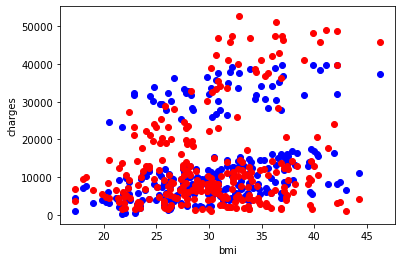

In [61]:
DrawRelationship(X_test, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Lasso_pred) 

In [62]:
print(np.sqrt(mean_squared_error(y_test, Lasso_pred)))

5706.828267444733


<h1>RidgeCV</h1>

In [64]:
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV()
ridge_reg.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [65]:
Ridge_pred = ridge_reg.predict(X_test)
Ridge_acc = ridge_reg.score(X_test, y_test)

In [66]:
print(Ridge_pred[:5])
print(Ridge_acc)

[11160.13215998  9477.12191969 38748.57258406 16164.46768721
  6868.18450393]
0.7979949664946049


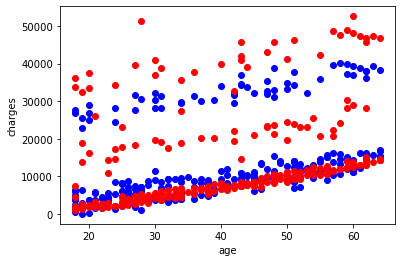

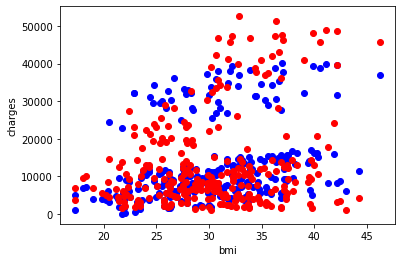

In [67]:
DrawRelationship(X_test, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Ridge_pred) 

In [68]:
print(np.sqrt(mean_squared_error(y_test, Ridge_pred)))

5669.660780910376


<h1>ElasticNetCV</h1>

In [69]:
from sklearn.linear_model import ElasticNetCV
ela_reg = ElasticNetCV()
ela_reg.fit(X_train, y_train)

ElasticNetCV()

In [70]:
Ela_pred = ela_reg.predict(X_test)
Ela_acc = ela_reg.score(X_test, y_test)

In [71]:
print(Ela_pred[:5])
print(Ela_acc)

[15518.76471281 14477.55715298 16291.43670527 18333.40127975
 13659.53543927]
0.13965876219859363


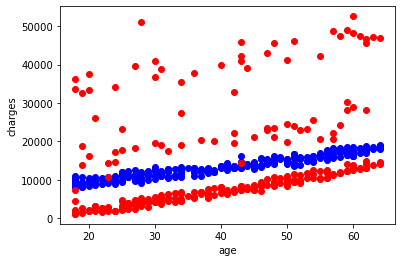

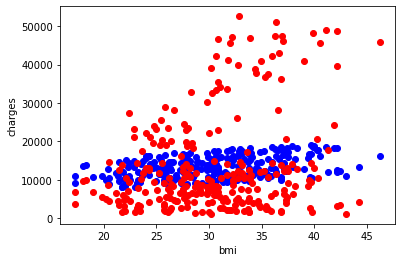

In [72]:
DrawRelationship(X_test, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Ela_pred) 

In [73]:
print(np.sqrt(mean_squared_error(y_test, Ela_pred)))

11700.686678802604


<h1>RandomForestRegressor</h1>

In [75]:
from sklearn.ensemble import RandomForestRegressor
rfg_reg = RandomForestRegressor()
rfg_reg.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
Rfg_pred = rfg_reg.predict(X_test)
Rfg_acc = rfg_reg.score(X_test, y_test)

In [77]:
print(Rfg_pred[:5])
print(Rfg_acc)

[ 9958.7476705 10674.0475304 43971.4517682 13756.8720491  9937.206448 ]
0.8733084490573036


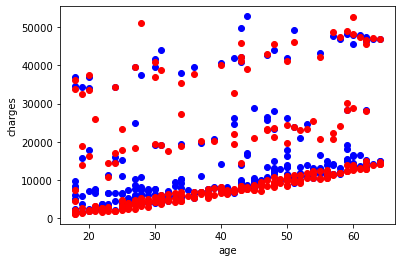

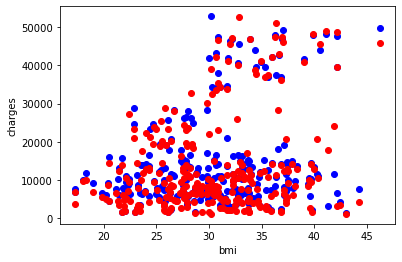

In [78]:
DrawRelationship(X_test, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Rfg_pred) 

In [80]:
print(np.sqrt(mean_squared_error(y_test, Rfg_pred)))

4490.035827033335
